In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.1MB 9.5MB/s 


In [ ]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [ ]:
path = Path('/content/drive/My Drive/knen')


In [ ]:
class kaenTokenizer(BaseTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load(str(path/"tokenizer/kn_en_spm_10k.model"))
        
    def tokenizer(self, t:str) -> List[str]:
        return self.sp.EncodeAsPieces(t)

In [ ]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"tokenizer/kn_en_spm_10k.model"))
itos = [sp.IdToPiece(int(i)) for i in range(10000)]

In [ ]:
itos[:20]


['<unk>',
 '<s>',
 '</s>',
 's',
 '▁song',
 '▁and',
 'e',
 '▁super',
 '▁',
 'u',
 '▁the',
 '▁you',
 'ing',
 'a',
 '▁love',
 '▁this',
 '▁sir',
 'y',
 '▁kannada',
 '▁like']

In [ ]:
vocab = Vocab(itos)

In [ ]:
tokenizer = Tokenizer(tok_func=kaenTokenizer, lang='kaen')


In [ ]:
tokenizer.special_cases


['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [ ]:
lmtext=open(path/'rawtext.txt').read().split('\n')

In [ ]:
lm=pd.DataFrame()
lm['text']=lmtext

In [ ]:
lmTrain,lmTest=train_test_split(lm,test_size=0.3)

In [ ]:
lmTrain.to_csv('/content/drive/My Drive/knen/txt/train/train.txt',index=None,header=None)
lmTest.to_csv('/content/drive/My Drive/knen/txt/valid/test.txt',index=None,header=None)

In [ ]:
data_lm = TextLMDataBunch.from_folder(path=path/'txt', tokenizer=tokenizer, vocab=vocab)

In [ ]:
data_lm.batch_size


64

In [ ]:
data_lm.show_batch()


idx,text
0,▁avru ▁ashte ▁dedicat ed ▁and ▁matur ed ▁decision ▁love ▁whole ▁team ▁and ▁effort ▁please ▁and ▁are ▁waiting ▁for ▁love ▁mocktail ▁also ▁super ▁bro ▁became ▁big ▁fan ▁after ▁hear ing ▁this ▁song ▁super ▁bro ▁yest u ▁sala ▁nodidru ▁bejar agalla ▁she ▁look ▁like ▁aunty ▁be hind ▁yuvaraj a ▁look ing ▁views ▁movie ▁videos ▁god ▁bless ▁jai ▁ saheb a ▁idhe ▁reethi ▁pata na ▁bai pata ▁p ta ▁nhi ▁kyu n ▁but
1,▁message ▁best ▁person ▁huli ▁voice ▁sir ▁nimdu ▁please ▁give ▁link ▁for ▁comedy ▁khiladi ▁where ▁vani ▁and ▁surya ▁done ▁mimi cry ▁its ▁very ▁yenu ke ▁antha ▁idhi na ▁idru ▁bad lu ▁summ e ▁irbodu ▁well ▁said ▁boss ▁dislike ▁love ▁failure ▁guys ▁but ▁komal ▁hit ▁police ▁should ▁point ▁that ▁dada giri ▁rajesh ▁krishnan ▁superb ▁voice ▁ambare esh ▁look s ▁keep ing ▁good ▁dev adiga ▁nanu ▁bosudi ▁kachh e ▁fan ▁avnu ▁remake ▁mana
2,▁nikhil ▁dance s ▁well ▁guys ▁made ▁day ▁well ▁said ▁yash ▁boss ▁gajanan a ▁sharm a ▁avru ▁bareda ddu ▁very ▁beautiful ▁jodi ▁nice ▁song ▁from ▁fans ▁really ▁have ▁golden ▁voice ▁and ▁beautiful ▁soul ▁heart ▁and ▁whole ▁body ▁cover s ▁sriram a ▁wave s ▁sang liyana ▁fvrt ▁movie ▁boss ▁hair ▁style ▁fantasti c ▁this ▁not ▁dis c i p line ▁one ▁onl y ▁one ▁person ▁should ▁than ▁onl y ▁this ▁ fish
3,▁love ▁you ▁hmm ▁f ch fi n ▁h j v fj s ad g x c th tv ▁really ▁true ▁gentlem an ▁wait ed ▁for ▁this ▁official ▁video ▁final ly ▁really ▁super ▁venkat ▁sir ▁yes ▁bhai ▁ achcha ▁nahi n ▁lag ▁raha ▁hai ▁niv ▁boy s ▁smoke ▁ante ▁drink s ▁ante ▁madthira ▁adu ▁samskruthi ▁yesto ▁hudgir ▁mel ▁rape ▁aguthe ▁adu ▁samskruthi ▁niv ▁boy s ▁ban iya n ▁short s ▁akond
4,▁sir ▁kumar ▁video ▁game ▁padma ▁andhra ▁big ▁fan ▁gadda ▁remove d ▁now ▁yur ▁face ▁very ▁nice ▁supp per ▁ganesh ▁swamy ▁choreograph y ▁exact ly ▁the ▁great ▁stars ▁like ▁the ▁punith ▁sir ▁never ▁pa m per ▁kids ▁superb ▁movie ▁and ▁songs ▁ambi ▁anna ▁ena dhru ▁color s ▁kannada ▁color ▁full ▁super ▁rocky ▁boy ▁anna ▁mathe ▁akka ▁bai ▁alla ▁bayi ▁super ▁show ▁fun ▁sri nidhi ▁nagesh ▁wts p ▁numb r ▁kot be


In [ ]:
len(data_lm.vocab.itos)


10000

In [ ]:
data_lm.save(path/'lm/data_lm_kenglish_10k.pkl')


In [ ]:
data_lm = load_data(path/'txt', path/'lm/data_lm_kenglish_10k.pkl')


In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3, pretrained=False)


In [ ]:
gc.collect()


0

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


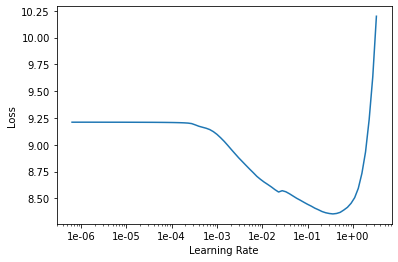

In [ ]:
learn.lr_find()
learn.recorder.plot()


In [ ]:
learn.fit_one_cycle(10, 1e-2, moms=(0.8,0.7))


epoch,train_loss,valid_loss,accuracy,time
0,4.459222,6.270660,0.157181,00:30
1,4.534464,6.334351,0.151862,00:30
2,4.758760,6.368954,0.149057,00:31
3,4.786158,6.401752,0.149785,00:31
4,4.661592,6.476864,0.149183,00:31
5,4.430912,6.528751,0.148357,00:32
6,4.126104,6.601703,0.148235,00:32
7,3.843888,6.624956,0.149558,00:32
8,3.711222,6.626817,0.151664,00:32
9,3.847540,6.597951,0.153302,00:32


In [ ]:
learn.save('kenglish_10k_first', with_opt=True)


In [ ]:
learn.load('kenglish_10k_first', with_opt=True);


In [ ]:
np.exp(6.597951)


733.5905212579991

In [ ]:
learn.unfreeze()


In [ ]:
learn.fit_one_cycle(50, 1e-2, moms=(0.8,0.7))


epoch,train_loss,valid_loss,accuracy,time
0,3.646231,6.623271,0.152422,00:30
1,3.566413,6.652393,0.151845,00:30
2,3.453263,6.686769,0.150876,00:30
3,3.356927,6.732710,0.149937,00:31
4,3.273237,6.786604,0.149023,00:31
5,3.224176,6.834579,0.148210,00:31
6,3.213229,6.889638,0.146580,00:32
7,3.258295,6.917754,0.145932,00:32
8,3.344370,6.940232,0.143767,00:32
9,3.452481,6.963284,0.142714,00:32


In [ ]:
learn.save('kenglish_10k_second', with_opt=True)


In [ ]:
learn.load('kenglish_10k_second', with_opt=True);


In [ ]:
learn.fit_one_cycle(100, 1e-3, moms=(0.8,0.7))


epoch,train_loss,valid_loss,accuracy,time
0,1.358004,7.980996,0.138304,00:32
1,1.529142,7.983572,0.138536,00:32
2,1.469804,7.979778,0.138486,00:32
3,1.524394,7.988861,0.138309,00:32
4,1.407892,7.986888,0.138292,00:32
5,1.389993,7.991127,0.137972,00:32
6,1.327568,8.005375,0.138347,00:32
7,1.313260,8.029420,0.137382,00:32
8,1.288101,8.032857,0.137441,00:32
9,1.304638,8.030489,0.137955,00:32


Buffered data was truncated after reaching the output size limit.

In [ ]:
learn.export('/content/drive/My Drive/knen/lm/kenglish.pkl')


In [ ]:
path

PosixPath('/content/drive/My Drive/knen')

In [ ]:
learn.save('/content/drive/My Drive/knen/lm/ken')
